# Matrix Factorization and Sound Source Separation   
### George Tzanetakis, University of Victoria

In this notebook, we will look at the basic ideas behind matrix factorization and especially non-negative matrix factorization and how it can be used for sound source separation in music. 



In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

Let's start our exposition by considering two binary vectors each one with 6 elements. 

In [71]:
a = np.array([1, 0, 1, 0, 0, 0])
b = np.array([0, 0, 0, 1, 1, 0])
a = a.reshape(-1,1)
b = b.reshape(-1,1)
print(a.shape)
print(b.shape)

(6, 1)
(6, 1)


We can create a 6 by 2 matrix by stacking these two column vectors horizontally. We can visualize the two vectors and the resulting matrix to better understand the process. 

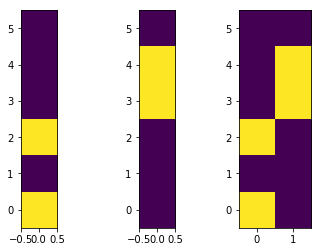

(6, 2)


In [76]:
plt.figure() 
plt.subplot(1,3,1)
plt.imshow(a, origin='lower')
plt.subplot(1,3,2)
plt.imshow(b, origin='lower')
plt.subplot(1,3,3)
W = np.hstack([a,b])
plt.imshow(W, origin='lower')
plt.show()
print(W.shape)

Now lets create a longer sequence of these vectors by repeating 4 times vector a, then two times vector b, and then 2 times vector a. The resulting matrix is a 6 by 7 matrix that we can visualize and clearly see the underlying patterns of repetition. 

(6, 7)


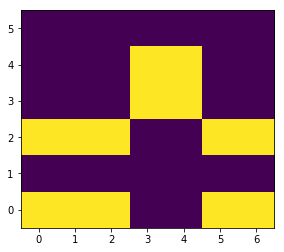

In [77]:
F = np.hstack([a,a,a,b,b,a,a])
print(F.shape)
plt.imshow(F,origin='lower')
plt.show()

Now lets consider a 2 by 7 matrix that has two rows where the first row has a one in the places where vector a is present and zero otherwise and the second row has ones and zeroes similarly for vector b. As we will see shortly this matrix encodes the repetitition structure of vectors a and b in the matrix F. 

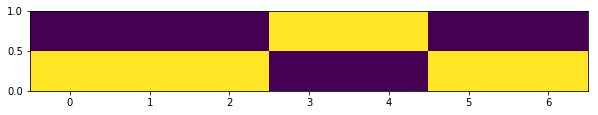

(2, 7)


In [83]:
H = np.array([[1,1,1,0,0,1,1], [0,0,0,1,1,0,0]])

plt.figure(figsize=(10,20))
plt.imshow(H, origin='lower')
plt.ylim([0.0, 1.0])
plt.show()
print(H.shape)

If we multiply the matrix W which has as columns the original vectors a and b and the matrix H that has rows that indicate where a is present and where b is present then we get as the result the matrix Fn which is identical to the matrix F. So basically the matrix H encodes the positions and repetitions of the vectors a and b when they form matrix F. 

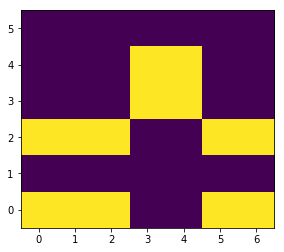

In [85]:
Fn = np.matmul(W,H)
Fn.shape
plt.imshow(Fn, origin='lower')
plt.show()

Lets visualize this matrix multiplication - if your memory of matrix multiplication is rusty this would be a good place to take a break and review the concept - there are plenty of tutorial and videos online. 

<Figure size 288x576 with 0 Axes>

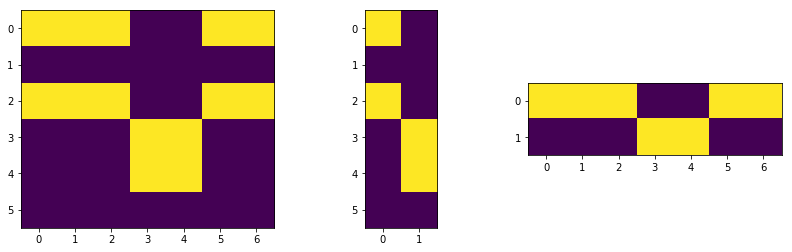

(6, 7)
(6, 2)
(2, 7)


In [87]:
def adjustw(images, wspace="auto"):
    fig = images[0].axes.figure
    if wspace=="auto":
        wspace = fig.subplotpars.wspace
    top = fig.subplotpars.top
    bottom = fig.subplotpars.bottom
    shapes = np.array([im.get_array().shape for im in images])
    w,h = fig.get_size_inches()
    imw = (top-bottom)*h/shapes[:,0].max()*shapes[0,1] #inch
    n = len(shapes)
    left = -((n+(n-1)*wspace)*imw/w - 1)/2.
    right = 1.-left
    fig.subplots_adjust(left=left, right=right, wspace=wspace)

plt.figure(figsize=(4,8))
fig, ax = plt.subplots(1,3)
im1 = ax[0].imshow(Fn)
im2 = ax[1].imshow(W)
im3 = ax[2].imshow(H)
adjustw([im1,im2,im3], wspace=0.0)
plt.show()

print(F.shape)
print(W.shape)
print(H.shape)

The same process can also work when the underlying vectors/matrices are not just binary but have arbitrary values. Below shows an example. Each column of the matrix F is expressed as linear combination of the column vectors in W. H encodes the weights/coefficients of this linear combination. 

In [88]:
H = np.array([[0.8, 0.5, 0.8, 0.1, 0.2, 0.9, 0.8],
              [0.2, 0.5, 0.2, 0.9, 0.8, 0.1, 0.2]])
W = [[0.8, 0.1], 
     [0.0, 0.0], 
     [0.7, 0.1], 
     [0.0, 0.8], 
     [0.1, 0.9], 
     [0.1, 0.1]
    ]
Fn = np.matmul(W,H)


<Figure size 288x576 with 0 Axes>

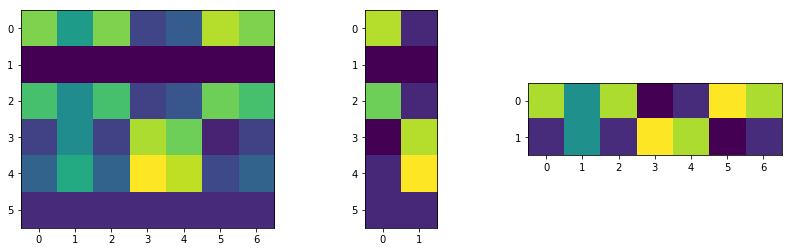

In [89]:
def adjustw(images, wspace="auto"):
    fig = images[0].axes.figure
    if wspace=="auto":
        wspace = fig.subplotpars.wspace
    top = fig.subplotpars.top
    bottom = fig.subplotpars.bottom
    shapes = np.array([im.get_array().shape for im in images])
    w,h = fig.get_size_inches()
    imw = (top-bottom)*h/shapes[:,0].max()*shapes[0,1] #inch
    n = len(shapes)
    left = -((n+(n-1)*wspace)*imw/w - 1)/2.
    right = 1.-left
    fig.subplots_adjust(left=left, right=right, wspace=wspace)

plt.figure(figsize=(4,8))
fig, ax = plt.subplots(1,3)
im1 = ax[0].imshow(Fn)
im2 = ax[1].imshow(W)
im3 = ax[2].imshow(H)
adjustw([im1,im2,im3], wspace=0.0)
plt.show()

Matrix factorization or decomposition refers to the process of expressing a matrix as the matrix product of two or more matrices. In the case we examined above the matrix F is expressed as the product of matrices W and H. 

There are two variants of factorization. In the first variant we are given matrix F and we want to find matrices W and H such as the matrix multiplication of W and H results in a matrix that approximates F. Generally this will not be a perfect match and factorization algorithms try to minimize some kind of error metric between the resulting Fn matrix and the original matrix F. 

In the second easier variant, matrices F and W are given and the goal is to estimate the matrix H. 


In many applications it desirable that the matrices W and H contain only positive and zero elements and has no negative value. What this implies is that each column of the matrix F is formed by summing with possibly different weights the columns of W. This is called non-negative matrix factorization (NMF). 

Sound source separation using time-frequency representations is one such application area. The matrix F is the magnitude spectrogram (or some other time-frequency representation) that shows how much energy there is for different time-frequency atoms. In theory when performing NMF on a spectrogram the matrix W will contain the magnitude spectra of the individual sound sources and the matrix H, also called the activiation matrix shows how they are combined at every time instance. The activation matrix can be viewed as a score and the basis matrix W can be considered as representing spectrally the different sound sources.
